<a href="https://colab.research.google.com/github/Yash43oss/Casting_dataset/blob/main/Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

## Canny Edge detection

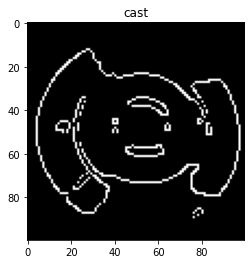

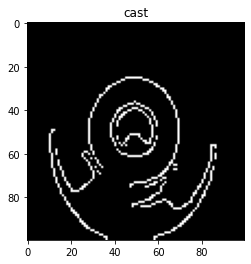

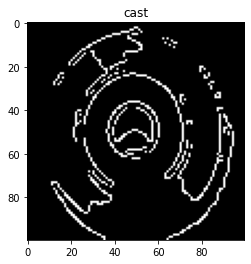

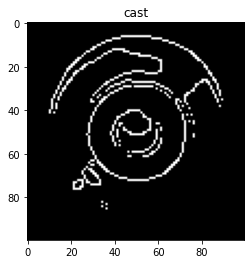

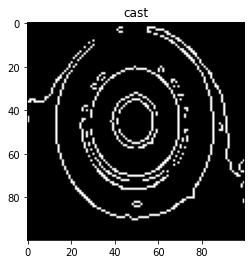

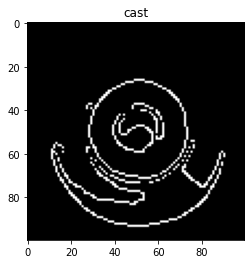

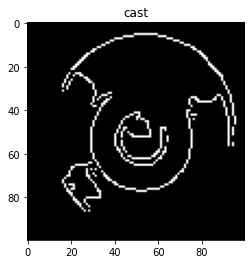

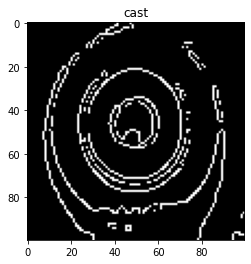

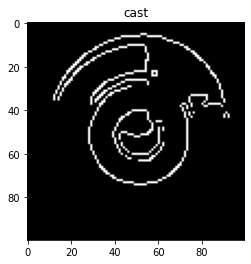

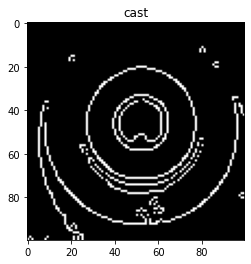

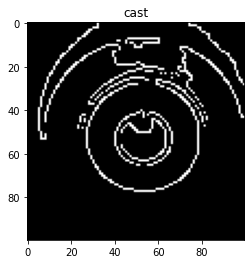

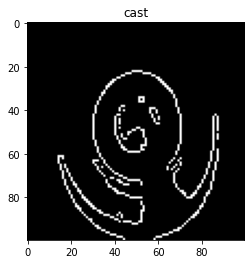

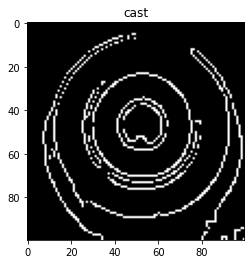

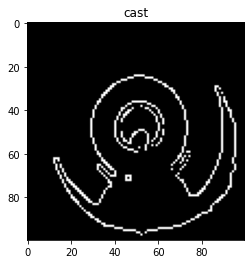

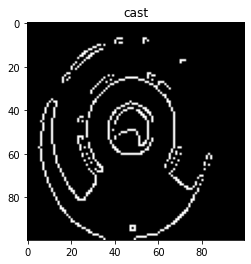

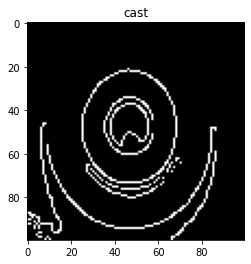

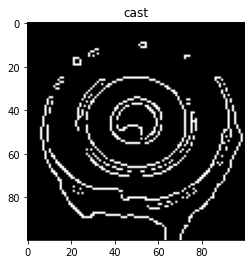

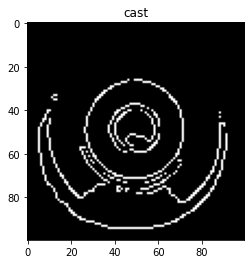

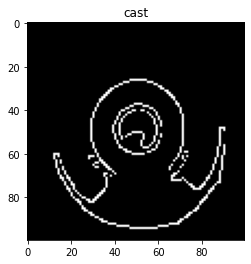

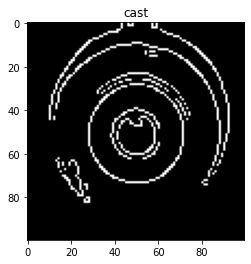

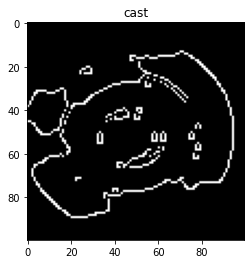

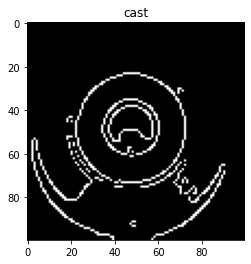

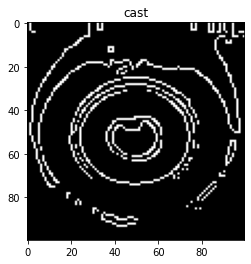

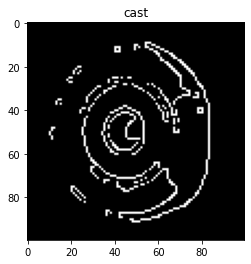

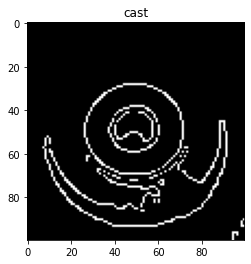

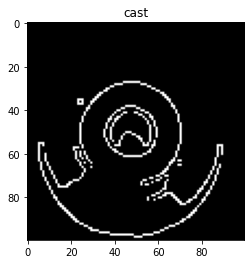

KeyboardInterrupt: ignored

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


path_to_images = '/content/casting_512x512/casting_512x512/def_front'

for file_name in os.listdir(path_to_images):
    img = cv2.imread(os.path.join(path_to_images, file_name), cv2.IMREAD_GRAYSCALE)
    label = file_name.split('_')[0]

    img = cv2.resize(img, (100, 100))
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    img = cv2.GaussianBlur(img,(3,3), 0 )
    edges = cv2.Canny(img, 0.3, 0.7)

    plt.imshow(edges, cmap='gray')
    plt.title(label)
    plt.show()


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive/archive

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: /content/drive/MyDrive/archive/casting_data/casting_data/train/def

## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## Laplacian Transform for better edge detection

In [ ]:
# For better edge detection
def get_laplacian(img):

    blurred = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=0).astype('uint8')

    ret, thr = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)

    contours, hierarchy = cv2.findContours(thr.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour_list = []
    for i, contour in enumerate(contours):
        approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        area = cv2.contourArea(contour)
        if (area > 10000):
            contour_list.append(contour)

    for i in range(len(contour_list)):
        img_contours = cv2.drawContours(img, contour_list, i, (255), -1)

    blurred2 = cv2.GaussianBlur(img_contours, ksize=(7,7), sigmaX=0)

    laplacian = cv2.Laplacian(blurred2, cv2.CV_64F, ksize=7)

    laplacian = laplacian.reshape(300,300,1)

    return laplacian

## Test and Train datasets

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale=1/255,
                                  validation_split=0.3,
                                  preprocessing_function=get_laplacian)

validation_generator = ImageDataGenerator(rescale=1/255,
                                         preprocessing_function=get_laplacian)

original_validation = ImageDataGenerator(rescale=1/255)

train = img_generator.flow_from_directory('/content/drive/MyDrive/archive/casting_data/casting_data/train',
                                          target_size=(300,300),
                                          color_mode='grayscale',
                                          class_mode='binary',
                                          subset='training')

test = img_generator.flow_from_directory('/content/drive/MyDrive/archive/casting_data/casting_data/train',
                                          target_size=(300,300),
                                          color_mode='grayscale',
                                          class_mode='binary',
                                          subset='validation')

validation = validation_generator.flow_from_directory('/content/drive/MyDrive/archive/casting_data/casting_data/test',
                                               target_size=(300,300),
                                               color_mode='grayscale',
                                               shuffle=False,
                                               class_mode='binary',
                                               batch_size=1)

original_images = original_validation.flow_from_directory('/content/drive/MyDrive/archive/casting_data/casting_data/test',
                                               target_size=(300,300),
                                               color_mode='grayscale',
                                               shuffle=False,
                                               class_mode='binary',
                                               batch_size=1)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
train.class_indices

{'def_front': 0, 'ok_front': 1}

## Defining Neural network for detecting casting defects using keras

In [ ]:
#Creating model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 298, 298, 28)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 296, 296, 28)      7084      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 148, 148, 28)     0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 146, 146, 28)      7084      
                                                                 
 conv2d_22 (Conv2D)          (None, 144, 144, 28)      7084      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 72, 72, 28)       0         
 g2D)                                                 

## Training model

In [ ]:
history = model.fit(train,epochs=10,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test))

Epoch 1/10
146/146 [==============================] - 50s 297ms/step - loss: 0.5714 - accuracy: 0.7177 - val_loss: 0.4132 - val_accuracy: 0.7858
Epoch 2/10
146/146 [==============================] - 42s 285ms/step - loss: 0.1907 - accuracy: 0.9233 - val_loss: 0.0970 - val_accuracy: 0.9688
Epoch 3/10
146/146 [==============================] - 42s 285ms/step - loss: 0.0523 - accuracy: 0.9804 - val_loss: 0.0488 - val_accuracy: 0.9854
Epoch 4/10
146/146 [==============================] - 42s 284ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0471 - val_accuracy: 0.9859
Epoch 5/10
146/146 [==============================] - 42s 284ms/step - loss: 0.0375 - accuracy: 0.9860 - val_loss: 0.0411 - val_accuracy: 0.9904
Epoch 6/10
146/146 [==============================] - 42s 288ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0262 - val_accuracy: 0.9940
Epoch 7/10
146/146 [==============================] - 42s 285ms/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.1101 - val_ac

### Training Evaluation graph

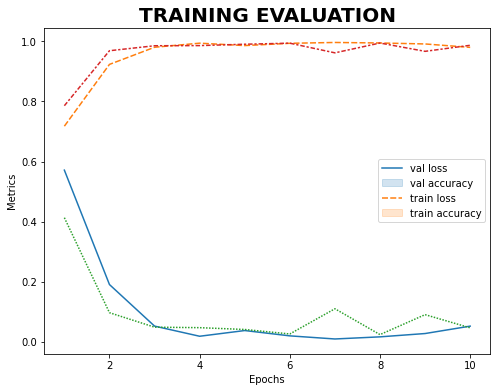

In [ ]:
import seaborn as sns
plt.subplots(figsize = (8, 6))
sns.lineplot(data = pd.DataFrame(model.history.history,
                                 index = range(1, 1+len(model.history.epoch))))
plt.title("TRAINING EVALUATION", fontweight = "bold", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")

plt.legend(labels = ['val loss', 'val accuracy', 'train loss', 'train accuracy'])
plt.show()

In [ ]:
results = model.predict(validation)

715/715 [==============================] - 6s 8ms/step


### Confusion matrix

In [ ]:
predicted_classes = []

for i in results:
    if i >= 0.90:
        predicted_classes.append(1)
    else:
        predicted_classes.append(0)

predicted_classes = np.array(predicted_classes)
true_classes = validation.classes
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(predicted_classes, true_classes))
print(confusion_matrix(predicted_classes, true_classes))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       463
           1       0.95      0.99      0.97       252

    accuracy                           0.98       715
   macro avg       0.97      0.98      0.98       715
weighted avg       0.98      0.98      0.98       715

[[451  12]
 [  2 250]]


## Result Visualization

Image:  96
Predicted as OK
[92] % sure


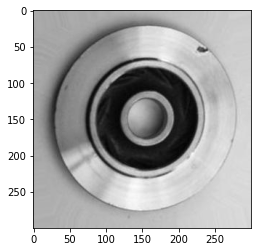

Image:  191
Predicted as OK
[99] % sure


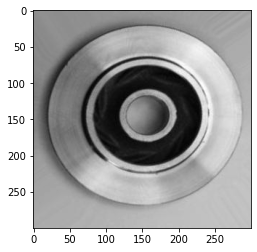

Image:  462
Predicted as defect
[20] % sure


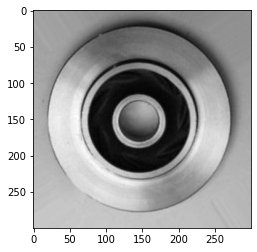

Image:  495
Predicted as defect
[61] % sure


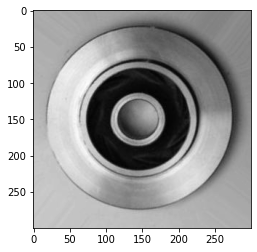

Image:  508
Predicted as defect
[42] % sure


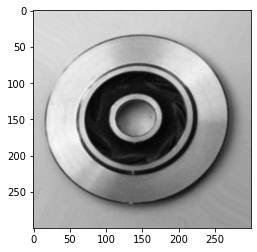

Image:  517
Predicted as defect
[63] % sure


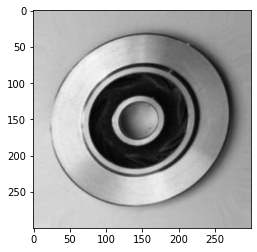

Image:  518
Predicted as defect
[21] % sure


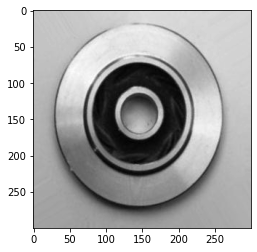

Image:  530
Predicted as defect
[21] % sure


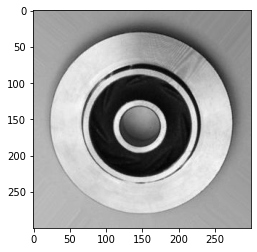

Image:  608
Predicted as defect
[30] % sure


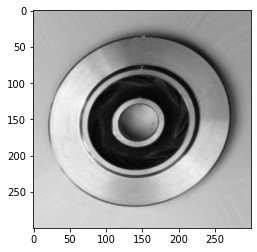

Image:  619
Predicted as defect
[83] % sure


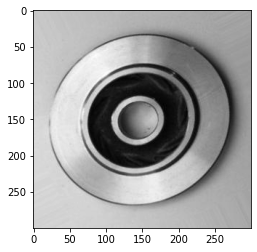

Image:  625
Predicted as defect
[23] % sure


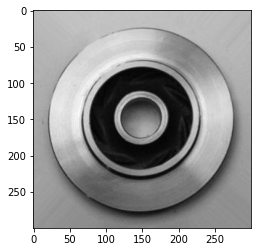

Image:  626
Predicted as defect
[13] % sure


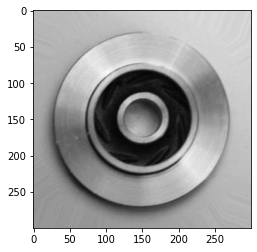

Image:  663
Predicted as defect
[73] % sure


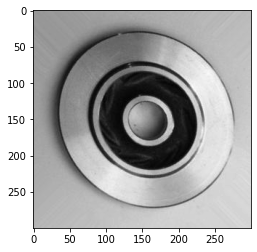

Image:  705
Predicted as defect
[21] % sure


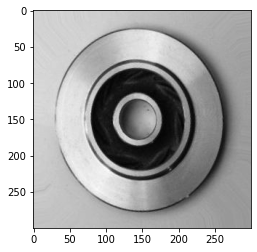

In [ ]:
missed = np.where(predicted_classes != true_classes)
for i in missed[0]:

    print('Image: ',i)
    if predicted_classes[i] == 1:
        print('Predicted as OK')
        print((results[i]*100).astype('int8'),'% sure')
    else:
        print('Predicted as defect')
        print(((1-results[i])*100).astype('int8'),'% sure')

    plt.imshow(original_images[i][0][0],cmap='gray')
    plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Casting_Model/model')